In [9]:
import pandas as pd
import statsmodels.api as sm

In [2]:
results_db_2 = pd.read_pickle('data/results_db_dummy.pkl')
results_db_disa_2 = pd.read_pickle('data/results_db_disa_dummy.pkl')
results_db_disa_seller_2 = pd.read_pickle('data/results_db_disa_seller_dummy.pkl')
results_db_agree_buyer_2 = pd.read_pickle('data/results_db_agree_buyer_dummy.pkl')
results_db_agree_seller_2 = pd.read_pickle('data/results_db_agree_seller_dummy.pkl')

In [3]:
final_db_distributive_nego  = pd.concat([results_db_2
,results_db_disa_2
,results_db_disa_seller_2
,results_db_agree_buyer_2
,results_db_agree_seller_2],axis =0, ignore_index=True)

In [53]:
final_db_distributive_nego_accept = final_db_distributive_nego[~final_db_distributive_nego.reject]


final_db_distributive_nego_accept['G_2'] = (final_db_distributive_nego_accept['U_b'] - final_db_distributive_nego_accept['U_s']).abs() / (final_db_distributive_nego_accept['U_b'].abs() + final_db_distributive_nego_accept['U_s'].abs()) 

C:\Users\31721\AppData\Local\Temp\ipykernel_20040\4225599326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_db_distributive_nego_accept['G_2'] = (final_db_distributive_nego_accept['U_b'] - final_db_distributive_nego_accept['U_s']).abs() / (final_db_distributive_nego_accept['U_b'].abs() + final_db_distributive_nego_accept['U_s'].abs())


In [8]:
#final_db_distributive_nego_accept['Control']

In [118]:
#sms.Mediation??



final_db_distributive_nego_accept['B_fairness'] = (final_db_distributive_nego_accept['U_b'] - (60 - 50 ) ) /(60 +40) 
final_db_distributive_nego_accept['S_fairness'] = (final_db_distributive_nego_accept['U_s'] - (50 -40) ) /(60 +40)

final_db_distributive_nego_accept['RFD'] = (final_db_distributive_nego_accept['B_fairness'] - final_db_distributive_nego_accept['S_fairness']).abs()/2







#Modified_Relative_Difference_P = (Actual_Player - NBS_Player) / (Utility_Max_P - Utility_Min_P)

C:\Users\31721\AppData\Local\Temp\ipykernel_20040\1879424763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_db_distributive_nego_accept['B_fairness'] = (final_db_distributive_nego_accept['U_b'] - (60 - 50 ) ) /(60 +40)
C:\Users\31721\AppData\Local\Temp\ipykernel_20040\1879424763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_db_distributive_nego_accept['S_fairness'] = (final_db_distributive_nego_accept['U_s'] - (50 -40) ) /(60 +40)
C:\Users\31721\AppData\Local\Temp\ipykernel_20040\1879

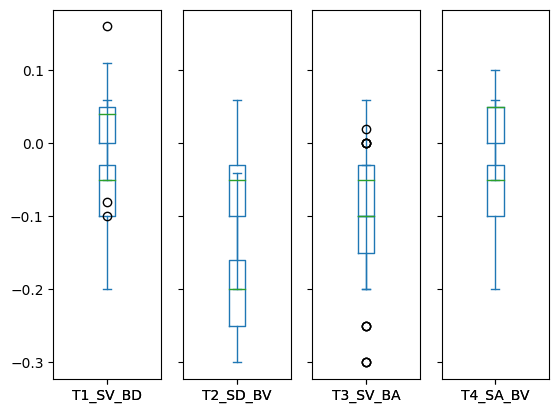

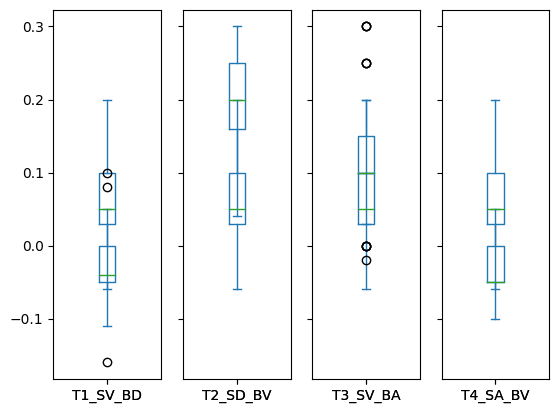

In [124]:
import matplotlib.pyplot as plt

fig,ax1 = plt.subplots(1,4,sharey=1)
fig,ax2 = plt.subplots(1,4,sharey=1)


for i,j in enumerate(['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']):
    temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1) | ( final_db_distributive_nego_accept['Control']==1)]
    
    temp_filter_df.groupby(j).plot(x =j, y = 'B_fairness',kind='box',ax = ax1[i],label = j)
    temp_filter_df.groupby(j).plot(x =j, y = 'S_fairness',kind='box',ax = ax2[i],label = j)
    #temp_filter_df.plot(x =j, y = 'S_fairness',kind='box',ax = ax2[i],label = j)
plt.show()

In [94]:
import numpy as np
from scipy.interpolate import interp1d

def gini(v, n_new = 1000):
    """Compute Gini coefficient of array of values"""
    v_abs = np.sort(np.abs(v))
    cumsum_v = np.cumsum(v_abs)
    n = len(v_abs)
    vals = np.concatenate([[0], cumsum_v/cumsum_v[-1]])
    x = np.linspace(0, 1, n+1)
    f = interp1d(x=x, y=vals, kind='previous')
    xnew = np.linspace(0, 1, n_new+1)
    dx_new = 1/(n_new)
    vals_new = f(xnew)
    return 1 - 2 * np.trapz(y=vals_new, x=xnew, dx=dx_new)

gini(np.array([0, 0, 0,0,0,0,0]))

C:\Users\31721\AppData\Local\Temp\ipykernel_20040\1032702901.py:9: RuntimeWarning: invalid value encountered in divide
  vals = np.concatenate([[0], cumsum_v/cumsum_v[-1]])


nan

In [120]:
outcome_variables = ['U_s', 'U_b', 'B_fairness','S_fairness','RFD']

In [121]:


model_summaries ={ i:{j:[] for j in ['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV'] } for i in outcome_variables}
model_params = { i:{j:[] for j in ['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV'] } for i in outcome_variables}



for j in ['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']:
    temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1) | ( final_db_distributive_nego_accept['Control']==1)]
    
    for i in outcome_variables:
    
    
        Y = temp_filter_df[i]
        X = temp_filter_df[j]
        X = sm.add_constant(X)

        model = sm.OLS(Y, X).fit()

        model_summaries[i][j] = (model.summary2())
        model_params[i][j] = dict(radj = model.rsquared_adj
                        ,df_resid = model.df_resid
                        ,coeff = model.params
                        ,p = model.pvalues
                        ,SEs = model.bse)

#final_db_distributive_nego_accept.columns






In [22]:
model_params['RFD'].keys(), model_params['RFD']['T1_SV_BD'].keys()

(dict_keys(['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']),
 dict_keys(['radj', 'df_resid', 'coeff', 'p', 'SEs']))

In [68]:
#final_db_distributive_nego_accept['G_2'].plot(kind='box')

In [122]:
#model_params[i][j]#['coeff']
regression_analysis = {k:[] for k in model_params.keys()}



for i,j in model_params.items():
    k_ra = []
    for k,m in j.items():
        #for n,m in l.items():
        coeff_ = dict(Treatment=k)
        p = m['p'].map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
        coeff_['Coeff'] = m['coeff'][k].round(2).astype(str) + p[k] 
        coeff_['Intercept'] = m['coeff']['const'].round(2)
        
        coeff_['SEs'] =  m['SEs'][k].round(2)#.map(lambda x : f" (SE:{x})" )
        coeff_['R^2 (adj)'] =  m['radj'].round(2)
        coeff_['Df_resid'] =  int(m['df_resid'])#.round(0)
        k_ra.append(coeff_)

    regression_analysis[i] = k_ra

    
    

#pd.DataFrame(regression_analysis ,index =model_params.keys()).T

In [123]:

for i in regression_analysis.keys():
    print(i,'---------------------------')
    display(pd.DataFrame(regression_analysis[i]).set_index('Treatment'))#.T

U_s ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,-9.58***,15.88,0.69,0.51,185
T2_SD_BV,15.04***,15.88,0.83,0.64,180
T3_SV_BA,6.1***,15.88,0.81,0.22,196
T4_SA_BV,-8.92***,15.88,0.64,0.50,195


U_b ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,9.58***,4.12,0.69,0.51,185
T2_SD_BV,-15.04***,4.12,0.83,0.64,180
T3_SV_BA,-6.1***,4.12,0.81,0.22,196
T4_SA_BV,8.92***,4.12,0.64,0.50,195


B_fairness ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,0.1***,-0.06,0.01,0.51,185
T2_SD_BV,-0.15***,-0.06,0.01,0.64,180
T3_SV_BA,-0.06***,-0.06,0.01,0.22,196
T4_SA_BV,0.09***,-0.06,0.01,0.50,195


S_fairness ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,-0.1***,0.06,0.01,0.51,185
T2_SD_BV,0.15***,0.06,0.01,0.64,180
T3_SV_BA,0.06***,0.06,0.01,0.22,196
T4_SA_BV,-0.09***,0.06,0.01,0.50,195


RFD ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,-0.01*,0.06,0.01,0.02,185
T2_SD_BV,0.15***,0.06,0.01,0.65,180
T3_SV_BA,0.06***,0.06,0.01,0.22,196
T4_SA_BV,-0.02***,0.06,0.01,0.06,195
